# Linear Regression Predict

### อธิบายเบื้องต้น
- Linear Regression เป็นการหาความสัมพันธ์ของตัวแปรตั้งแต่ 2 ตัวขึ้นไป
- การหาความสัมพันธ์ของตัวแปร เช่น เมื่อ x สูงขึ้น y สูงขึ้นตาม x หรือ ลดลงตาม x
- โปรแกรมนี้จะใช้ library sklearn สำหรับการสร้างเป็น model และการทำนายข้อมูล

### Library
- sklearn ใช้สำหรับการสร้าง model และประเมิน model
- seaborn ใช้สำหรับสร้างกราฟเพื่อดูความสัมพันธ์ให้เข้าใจง่ายขึ้น
- joblib ใช้สำหรับับทึก model และนำกลับมาใช้ใหม่
- pandas สำหรับการสร้างข้อมูลเป็นตารางเพื่อให้อ่านง่ายขึ้น

### ตัวอย่างที่ใช้
- หาความสัมพันธ์ของการโฆษณากับจำนวนสินค้าที่ขายได้มีความสัมพันธ์กันอย่างไร
- ทดลองทำนายการลงทุนว่าจำนวนโฆษณาดังกล่าวเมื่อลงทุนแล้วยอดขายจะเป็นเท่าใดและแบบไหนคุ้มค่ากว่ากัน
- ประเมินความแม่นยำของ model ที่ใช้

In [1]:
!pip install sklearn --upgrade --quiet
!pip install seaborn --upgrade --quiet
!pip install joblib --upgrade --quiet

In [2]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib
import seaborn as sns
import pandas as pd
import time

In [3]:
ads_facebook_data = [100, 180, 300, 410, 520, 600] # ค่าโฆษณาทางเฟสบุค
ads_lazada_data = [200, 240, 250, 300, 400, 450] # ค่าโฆษณาทางลาซาด้า
ads_shopee_data = [150, 200, 280, 400, 600, 800] #ค่าโฆษณาทางชอปปี้
sales_data = [10, 14, 25, 28, 30, 35] # ค่าโฆษณาทางเฟสบุค

## สร้างข้อมูลให้อยู่ในรูปของตารางและกราฟ
- ใช้ pandas ทำการสร้างตารางขึ้นมาโดยแบ่งออกเป็น 4 fields
- ดูแนวโน้มโดยใช้กราฟที่ seaborn สร้างขึ้น

In [4]:
table_data = {
    'Facebook' : ads_facebook_data,
    'Lazada' : ads_lazada_data,
    'Shopee' : ads_shopee_data,
    'Sales': sales_data
}

df = pd.DataFrame(table_data, index=None)
df

,Facebook,Lazada,Shopee,Sales
0,100,200,150,10
1,180,240,200,14
2,300,250,280,25
3,410,300,400,28
4,520,400,600,30
5,600,450,800,35


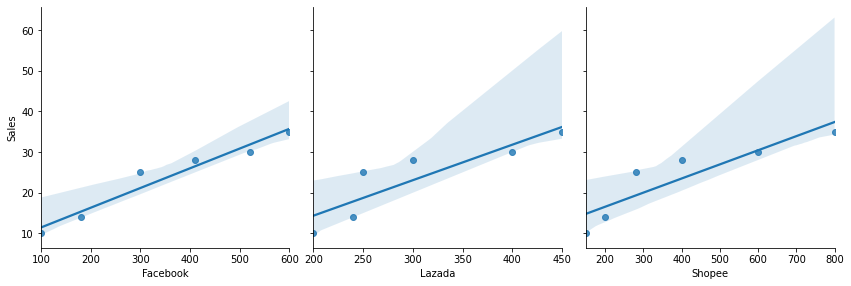

In [5]:
x = [df.Facebook, df.Lazada, df.Shopee]
y = df.Sales
sns.pairplot(df, x_vars=['Facebook', 'Lazada', 'Shopee'], 
            y_vars='Sales', height=4,
            kind='reg')

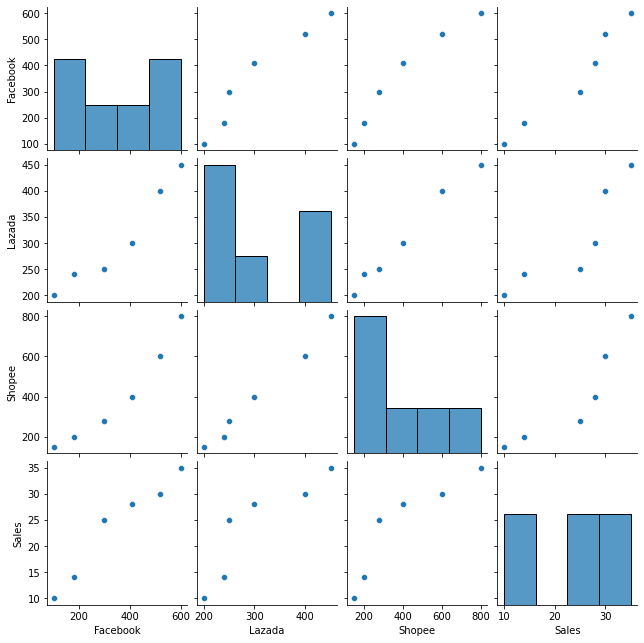

In [6]:
g = sns.pairplot(df)
g.fig.set_size_inches(9,9)

## ทำการสร้าง Model ด้วย sklearn

In [7]:
feature_cols = ['Facebook', 'Lazada', 'Shopee']
X = df[feature_cols]
y = df.Sales

model = LinearRegression()
model.fit(X, y)

LinearRegression()

### ทำการประเมินความแม่นยำโดยหาค่า R2
- R2 R Square หรือ สัมประสิทธิ์การตัดสินใจ (Coefficient of Determination)
- คำสั่งประเมิน : model.score(X, y) 
- ค่าที่ได้มีความแม่นยำอยู่ที่ 99%

In [8]:
model.score(X, y)

0.9918465624623668

## การทำนาย
- ทำการทำนายโดยจำลองข้อมูลใหม่ขึ้นมาแล้วให้ Model ทำนายผลลัพธ์ยอดขาย
- แบ่งเหตุการออกเป็น 5 เหตุการณ์
- 3 เหตุการณ์เป็นการลงทุนช่องทางเดียว
- ผลลัพธ์ที่ได้เป็นยอดขาย 
- เหตุการณ์แรกคุ้มค่ากับการลงทุนมากที่สุดนั่นคือ การลงทุนโฆษณาในเฟสบุค
- เหตุการณ์ที่เสี่ยงต่อการลงทุนมากที่สุดคือเหตุการณ์ที่สองเป็นลงทุนกับลาซาด้า

In [9]:
mock_data = [
    [400, 0, 0],
    [0, 400, 0], 
    [0, 0, 400], 
    [100, 150, 150], 
    [200, 50, 150]
]
result = model.predict(mock_data)
table_result = pd.Series(model.predict(mock_data))
table_result

0    55.974838
1   -23.913450
2    30.872340
3    16.603293
4    36.575365
dtype: float64

### ทำการบันทึก model เป็นไฟล์ ด้วย joblib
- เมื่อระยะเวลาผ่านไปหรือเห็นว่า model ไม่เหมาะสม
- ให้ทำการนำ data มาทำการ Train Model ใหม่อีกครั้ง
- การใช้ model เดิมให้ทำการใช้ฟังก์ชัน joblib.load('ชื่อ model')

In [10]:
joblib.dump(model, 'my_model_ads {}.pkl'.format(time.strftime('%Y-%m-%d', time.localtime())))

['my_model_ads 2021-05-13.pkl']